<a href="https://colab.research.google.com/github/Rafaelnasario/Estudo_case/blob/main/Churn_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preveja os usuários
com alta chance de deixar seu
Streaming**

Utilize um modelo de classificação para mapear qual o perfil de
usuários tem mais chance de deixar sua plataforma de streaming.
Compreender quem é o perfil que está aumentando o churn do seu
negócio é essencial para tomar ações que reduzam essas perdas,
seja alterando critérios na venda ou modificando o produto.

-  Análise exploratória dos dados (Data
Understanding)

- Tratamento dos Dados (Data Preparation)

-  Modelagem dos Dados - Regressão Logística

- Modelagem dos Dados - Tunning

-  Modelagem dos Dados - Random Forest




In [35]:
# importando as bibliotecas

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn import datasets

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

**Análise exploratória dos dados (Data
Understanding)**


In [36]:
# importando a base de dados

churn = pd.read_csv("/content/streaming_data (1).csv")
churn.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [37]:
# descrição estatística dos dados

churn.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [38]:
# tipos de dados  e valores faltantes

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [39]:
# valores ausentes

churn.isna()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77879,False,False,True,True,False,True,False,False,False,False
77880,False,False,False,True,False,True,False,False,False,False
77881,False,False,True,False,False,True,False,False,False,False
77882,False,False,False,False,False,True,False,True,False,False


**Tratamento dos Dados (Data Preparation)**


In [40]:
# substituindo valores “NaN” por 0 Colunas → Time_on_platform,Num_streaming_services, Churned, Avg_rating, Devices_connected

churn['Num_streaming_services'].fillna(0, inplace=True)
churn['Avg_rating'].fillna(0, inplace = True)
churn['Time_on_platform'].fillna(0, inplace = True)
churn['Churned'].fillna(0, inplace = True)
churn['Devices_connected'].fillna(0, inplace = True)


In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [42]:
# Remove as linhas com valores nulos

churn['Gender'].dropna()
churn['Subscription_type'].dropna()
churn['Age'].dropna()

0        49.0
1        69.0
2        44.0
3        26.0
4        18.0
         ... 
77879    45.0
77880    47.0
77881    64.0
77882    58.0
77883    68.0
Name: Age, Length: 66607, dtype: float64

In [43]:
# quantidade de linhas duplicadas

duplicatas = churn.duplicated()

quantidade_duplicadas = duplicatas.sum()
print(f"Quantidade de registros duplicados: {quantidade_duplicadas}")

Quantidade de registros duplicados: 12403


In [44]:
churn = churn.drop_duplicates()

In [45]:
# visualizando como ficou dados

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65481 entries, 0 to 65480
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     55973 non-null  float64
 1   Gender                  53317 non-null  object 
 2   Time_on_platform        65481 non-null  float64
 3   Devices_connected       65481 non-null  float64
 4   Subscription_type       44301 non-null  object 
 5   Num_streaming_services  65481 non-null  float64
 6   Num_active_profiles     65481 non-null  int64  
 7   Avg_rating              65481 non-null  float64
 8   Churned                 65481 non-null  float64
 9   User_id                 65481 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.5+ MB


In [46]:
# excluindo linhas com valores nulos

churn = churn.dropna()


In [47]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30739 entries, 0 to 65479
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     30739 non-null  float64
 1   Gender                  30739 non-null  object 
 2   Time_on_platform        30739 non-null  float64
 3   Devices_connected       30739 non-null  float64
 4   Subscription_type       30739 non-null  object 
 5   Num_streaming_services  30739 non-null  float64
 6   Num_active_profiles     30739 non-null  int64  
 7   Avg_rating              30739 non-null  float64
 8   Churned                 30739 non-null  float64
 9   User_id                 30739 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.6+ MB


In [48]:
# visualizando churn por usuario

churn_agg = churn.groupby("Churned")["User_id"].count().reset_index()
churn_agg

,Churned,User_id
0,0.0,24774
1,1.0,5965


<Axes: xlabel='Churned', ylabel='User_id'>

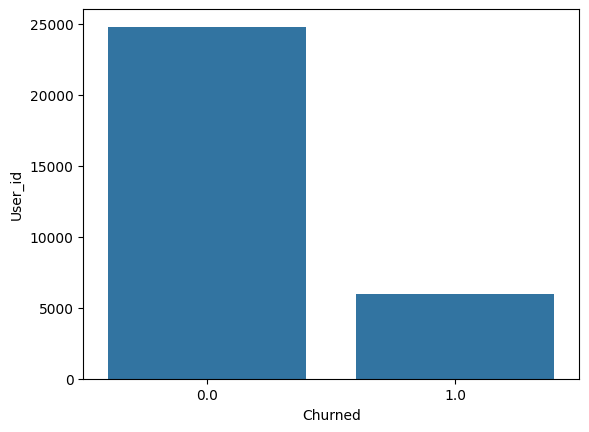

In [49]:
# grafico churn por usuario

sns.barplot(data=churn_agg, x="Churned", y="User_id")

In [50]:
# Quantidade de homens e mulher assinantes

churn_gender = churn.groupby("Gender")["User_id"].count().reset_index()
churn_gender = pd.DataFrame(churn_gender)
churn_gender

,Gender,User_id
0,Female,15248
1,Male,15491


In [51]:
# quantidade de aparelho por usuario

churn_payment = churn.groupby("Devices_connected")["User_id"].count()
churn_payment = pd.DataFrame(churn_payment)
churn_payment

,User_id
Devices_connected,
0.0,9855
1.0,4120
2.0,4205
3.0,4128
4.0,4282
5.0,4149


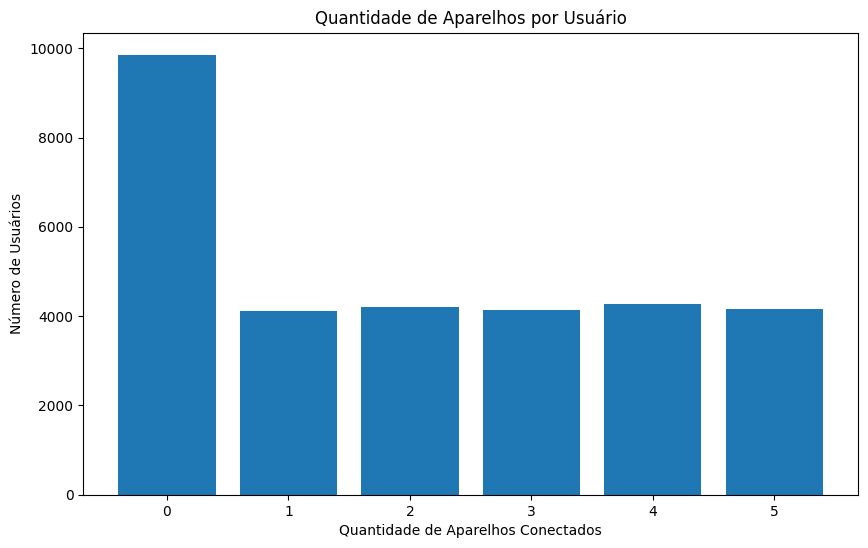

In [52]:
# Crie um gráfico de barras para visualizar os dados

churn_payment = churn.groupby("Devices_connected")["User_id"].count()

churn_payment_df = pd.DataFrame(churn_payment)

plt.figure(figsize=(10, 6))
plt.bar(churn_payment_df.index, churn_payment_df["User_id"])
plt.xlabel("Quantidade de Aparelhos Conectados")
plt.ylabel("Número de Usuários")
plt.title("Quantidade de Aparelhos por Usuário")
plt.show()

In [53]:
#  Transformando valores churned 0 e 1 por No e Yes


churn["churned_transformed"] = churn["Churned"].map({0: "No", 1: "Yes"})

In [54]:
# Transformando valores floats em valores inteiros

churn['Age'] = churn['Age'].astype(int)
churn['Time_on_platform'] = churn['Time_on_platform'].astype(int)
churn['Devices_connected'] = churn['Devices_connected'].astype(int)
churn['Num_streaming_services'] = churn['Num_streaming_services'].astype(int)
churn['Avg_rating'] = churn['Avg_rating'].astype(int)
churn['Churned'] = churn['Churned'].astype(int)

In [55]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30739 entries, 0 to 65479
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     30739 non-null  int64 
 1   Gender                  30739 non-null  object
 2   Time_on_platform        30739 non-null  int64 
 3   Devices_connected       30739 non-null  int64 
 4   Subscription_type       30739 non-null  object
 5   Num_streaming_services  30739 non-null  int64 
 6   Num_active_profiles     30739 non-null  int64 
 7   Avg_rating              30739 non-null  int64 
 8   Churned                 30739 non-null  int64 
 9   User_id                 30739 non-null  object
 10  churned_transformed     30739 non-null  object
dtypes: int64(7), object(4)
memory usage: 2.8+ MB


**Modelagem dos Dados - Regressão Logística**


In [56]:
# Definir variáveis X e y para o modelo

X = churn.drop(columns=["User_id", "Churned", 'churned_transformed'], axis = 1)

y = churn[["Churned"]]


In [57]:
# Realizar o .fit do modelo

le = LabelEncoder()
le.fit(y.Churned)
y.churn = le.transform(y.Churned)

X = pd.get_dummies(X)

<ipython-input-57-70b04f437a07>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.churn = le.transform(y.Churned)


In [58]:
# normalizando os dados entre zero e um

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [59]:
# Separar em train e test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [60]:
# Realizar a modelagem

model = LogisticRegression()
lr = model.fit(X_train, y_train)


lr.predict(X_test)

X_test.assign(churn=y_test).assign(label = lr.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6,7,8,9,10,churn,label
13619,0.372549,0.635803,0.0,0.00,0.50,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0
22828,1.000000,0.769723,0.0,0.00,0.25,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
3005,0.725490,0.000000,0.8,0.00,0.00,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
18403,0.000000,0.280511,0.0,0.00,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
12458,0.156863,0.189519,0.0,0.00,1.00,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,0.274510,0.786962,0.6,0.00,1.00,0.2,0.0,1.0,0.0,0.0,1.0,NaN,0
26788,0.529412,0.190775,1.0,0.00,0.75,0.4,0.0,1.0,0.0,1.0,0.0,NaN,0
24101,0.647059,0.000000,0.0,0.25,0.25,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
11018,0.235294,0.343304,0.6,0.50,1.00,0.6,0.0,1.0,1.0,0.0,0.0,NaN,0


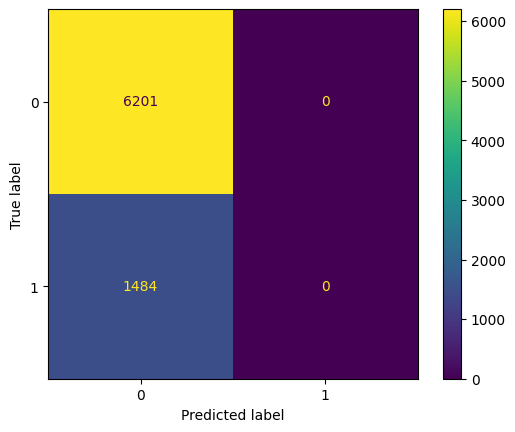

In [61]:
#  Plotar matrix confusão

predictions = lr.predict(X_test)
matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [63]:
# Printar métricas

print(f"Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}")

print(f"Precisão Treino: {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão Teste: {precision_score(y_test, lr.predict(X_test))}")

print(f"Recall Treino: {recall_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Teste: {recall_score(y_test, lr.predict(X_test))}")

print(f"F1 Treino: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Teste: {f1_score(y_test, lr.predict(X_test))}")

print(f"ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAU Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia Treino: 0.8056302593909951
Acurácia Teste: 0.8068965517241379
Acurácia Balanceada Treino: 0.5
Acurácia Balanceada Teste: 0.5
Precisão Treino: 0.0
Precisão Teste: 0.0
Recall Treino: 0.0
Acurácia Teste: 0.0
F1 Treino: 0.0
F1 Teste: 0.0
ROCAUC Treino: 0.5102248631079473
ROCAU Teste: 0.5027826244006379


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Modeling - Radom Forest**

In [64]:
# Definindo variáveis X e y para o modelo

rf =  RandomForestClassifier()

In [65]:
# Realizando o .fit do modelo

rf.fit(X_train, y_train)

<ipython-input-65-23b696fab076>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [66]:
# Separando em train e test

rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# . Realizar a modelagem

X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
13619,0.372549,0.635803,0.0,0.00,0.50,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0
22828,1.000000,0.769723,0.0,0.00,0.25,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
3005,0.725490,0.000000,0.8,0.00,0.00,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
18403,0.000000,0.280511,0.0,0.00,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
12458,0.156863,0.189519,0.0,0.00,1.00,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,0.274510,0.786962,0.6,0.00,1.00,0.2,0.0,1.0,0.0,0.0,1.0,NaN,0
26788,0.529412,0.190775,1.0,0.00,0.75,0.4,0.0,1.0,0.0,1.0,0.0,NaN,0
24101,0.647059,0.000000,0.0,0.25,0.25,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
11018,0.235294,0.343304,0.6,0.50,1.00,0.6,0.0,1.0,1.0,0.0,0.0,NaN,0


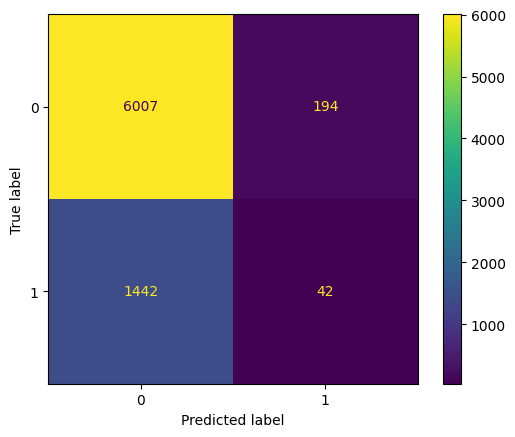

In [68]:
#  Plotar matrix confusão

predictions = rf.predict(X_test)
matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

In [69]:
# Printar métricas

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9940574303808449
Acurácia (Teste): 0.7871177618737801
Acurácia Balanceada (Treino): 0.9864911238322751
Acurácia Balanceada (Teste): 0.4985083051120787
Precision (Treino): 0.9952120383036935
Precision (Teste): 0.17796610169491525
Recall (Treino): 0.9741129212229414
Recall (Teste): 0.02830188679245283
F1-Score (Treino): 0.9845494530280816
F1-Score (Teste): 0.04883720930232558
ROCAUC (Treino): 0.9998794361538677
ROCAUC (Teste): 0.4979482811006485


**Modeling - Tunning**

In [70]:
# Realizando a montagem do grid search

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [71]:
# Realizando o .fit do modelo

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [72]:
 # Realizando o Tunning

dict = grid_search.best_estimator_.get_params()

dict

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
# Realizando o Tunning

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 1, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 100, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=1)

In [74]:
# Realizando o .fit do modelo

rf_tunned.fit(X_train, y_train)

<ipython-input-74-d600a0da2604>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=1)

In [75]:
# treinando modelo com paremetros

rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
# # treinando modelo com paremetros

X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
13619,0.372549,0.635803,0.0,0.00,0.50,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0
22828,1.000000,0.769723,0.0,0.00,0.25,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
3005,0.725490,0.000000,0.8,0.00,0.00,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
18403,0.000000,0.280511,0.0,0.00,0.25,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
12458,0.156863,0.189519,0.0,0.00,1.00,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,0.274510,0.786962,0.6,0.00,1.00,0.2,0.0,1.0,0.0,0.0,1.0,NaN,0
26788,0.529412,0.190775,1.0,0.00,0.75,0.4,0.0,1.0,0.0,1.0,0.0,NaN,0
24101,0.647059,0.000000,0.0,0.25,0.25,0.8,0.0,1.0,0.0,1.0,0.0,NaN,0
11018,0.235294,0.343304,0.6,0.50,1.00,0.6,0.0,1.0,1.0,0.0,0.0,NaN,0


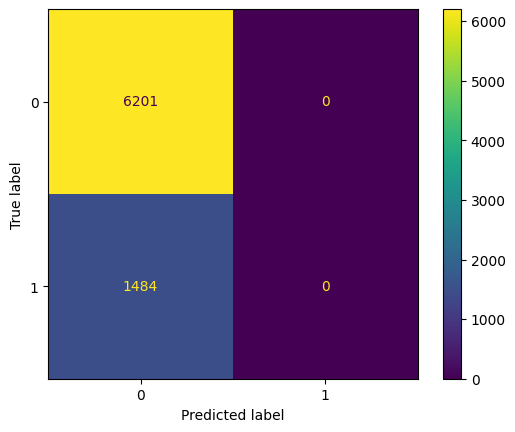

In [77]:
#  Plotar matrix confusão

predictions = rf_tunned.predict(X_test)
matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

In [78]:
# Printar métricas

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8056302593909951
Acurácia (Teste): 0.8068965517241379
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5219080873576744
ROCAUC (Teste): 0.500544864731408


**Conclusão**

o modelo que melhor performou **Modeling - Radom Forest** sendo muito superior aos outros modelos.